In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("C:/Users/manue/Downloads/house_price.csv")

In [40]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


### Perfom Basic EDA

In [9]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [10]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [11]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

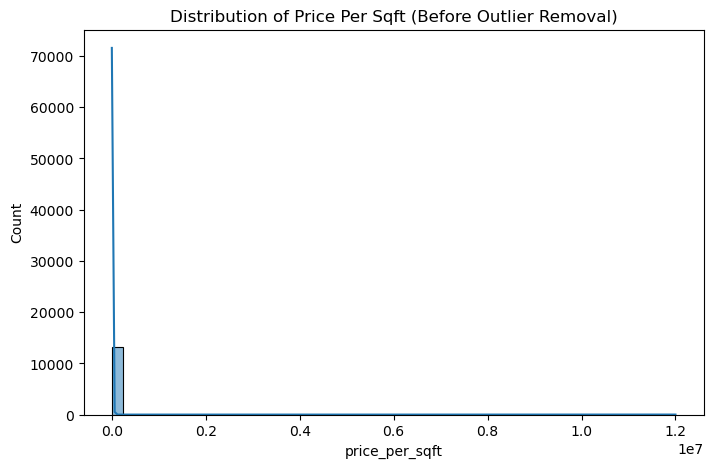

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_per_sqft'], kde=True, bins=50)
plt.title("Distribution of Price Per Sqft (Before Outlier Removal)")
plt.show()

### Outlier Detection & Removal

In [14]:
# Mean and Standard Deviation
mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev
df_trimmed_std = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

In [15]:
df_trimmed_std

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [16]:
# Percentile Method
lower_percentile = np.percentile(df['price_per_sqft'], 5)
upper_percentile = np.percentile(df['price_per_sqft'], 95)
df_trimmed_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

In [17]:
df_trimmed_percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [18]:
#3 IQR Method
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
lower_iqr = Q1 - 1.5 * IQR
upper_iqr = Q3 + 1.5 * IQR
df_trimmed_iqr = df[(df['price_per_sqft'] >= lower_iqr) & (df['price_per_sqft'] <= upper_iqr)]

In [25]:
df_trimmed_iqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [21]:
#4 z-score method
df['z_score'] = (df['price_per_sqft'] - mean) / std_dev
df_trimmed_zscore = df[(df['z_score'].abs() <= 3)]

In [38]:
df_trimmed_zscore

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.039553
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.030970
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.033875
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.015697
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.034390
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,-0.011537
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,0.029896
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.024945
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.023299


In [48]:
outlier_removal_counts = {
    "Original": df.shape[0],
    "Mean & Std Dev": df_trimmed_std.shape[0],
    "Percentile (5%-95%)": df_trimmed_percentile.shape[0],
    "IQR": df_trimmed_iqr.shape[0],
    "Z-score": df_trimmed_zscore.shape[0]}

In [50]:
print("\nOutlier Removal Summary:")
print(outlier_removal_counts)


Outlier Removal Summary:
{'Original': 13200, 'Mean & Std Dev': 13195, 'Percentile (5%-95%)': 11880, 'IQR': 11935, 'Z-score': 13195}


### Box Plot

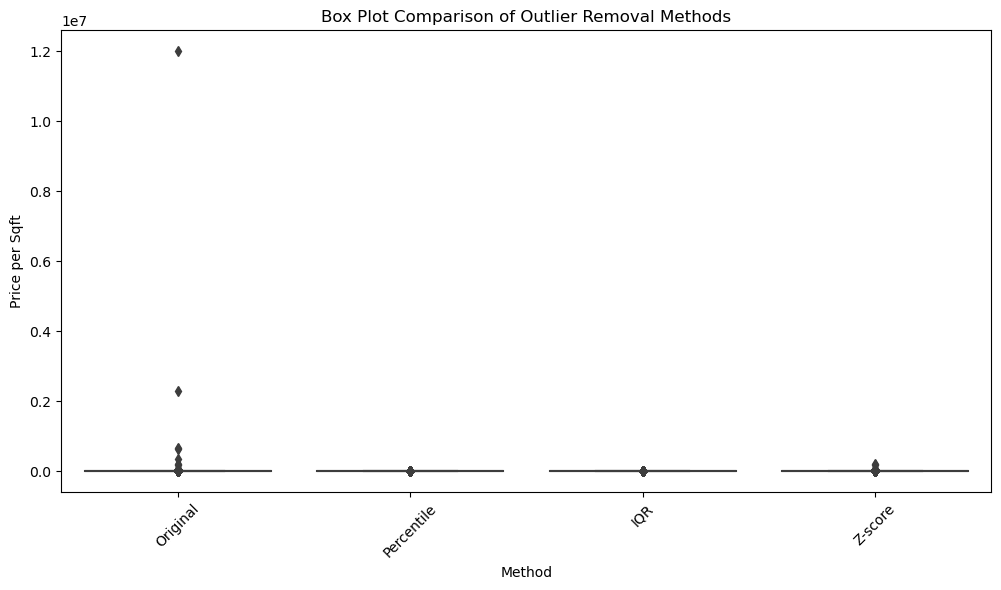

In [58]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Method", y="Price per Sqft", data=pd.concat([
    pd.DataFrame({"Price per Sqft": df['price_per_sqft'], "Method": "Original"}),
    pd.DataFrame({"Price per Sqft": df_trimmed_percentile['price_per_sqft'], "Method": "Percentile"}),
    pd.DataFrame({"Price per Sqft": df_trimmed_iqr['price_per_sqft'], "Method": "IQR"}),
    pd.DataFrame({"Price per Sqft": df_trimmed_zscore['price_per_sqft'], "Method": "Z-score"})]))
plt.title("Box Plot Comparison of Outlier Removal Methods")
plt.xticks(rotation=45)
plt.show()

### Checking Normality using Histogram

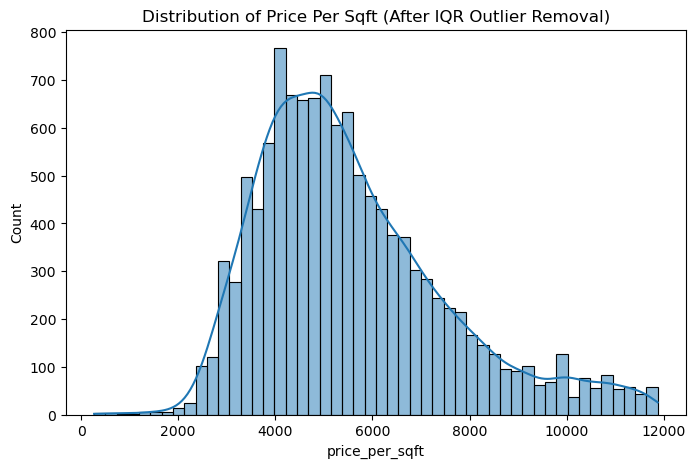

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(df_trimmed_iqr['price_per_sqft'], kde=True, bins=50)
plt.title("Distribution of Price Per Sqft (After IQR Outlier Removal)")
plt.show()

In [65]:
from scipy.stats import skew, kurtosis

In [67]:
print("\nSkewness Before Transformation:", skew(df_trimmed_iqr['price_per_sqft']))
print("Kurtosis Before Transformation:", kurtosis(df_trimmed_iqr['price_per_sqft']))


Skewness Before Transformation: 0.9445732298531184
Kurtosis Before Transformation: 0.6784399584501744


In [73]:
df_trimmed_iqr['price_per_sqft_log'] = np.log1p(df_trimmed_iqr['price_per_sqft'])

C:\Users\manue\AppData\Local\Temp\ipykernel_29444\2899840620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed_iqr['price_per_sqft_log'] = np.log1p(df_trimmed_iqr['price_per_sqft'])


In [75]:
print("\nSkewness After Log Transformation:", skew(df_trimmed_iqr['price_per_sqft_log']))
print("Kurtosis After Log Transformation:", kurtosis(df_trimmed_iqr['price_per_sqft_log']))


Skewness After Log Transformation: -0.12988210833124453
Kurtosis After Log Transformation: 1.3369230684904956


### Correlation Analysis

In [84]:
df_numeric = df_trimmed_iqr.select_dtypes(include=['number'])

In [86]:
corr_matrix = df_numeric.corr()

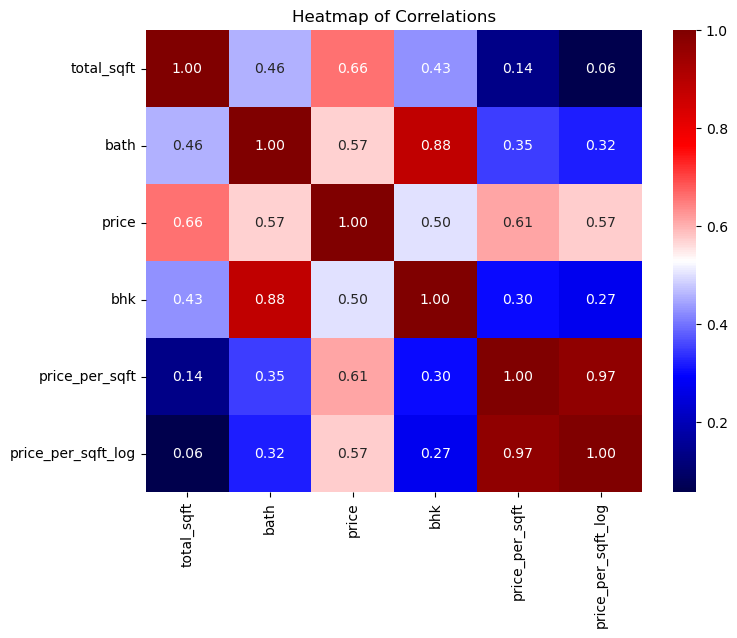

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="seismic", fmt=".2f")
plt.title("Heatmap of Correlations")
plt.show()

### Scatter Plot

C:\Users\manue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


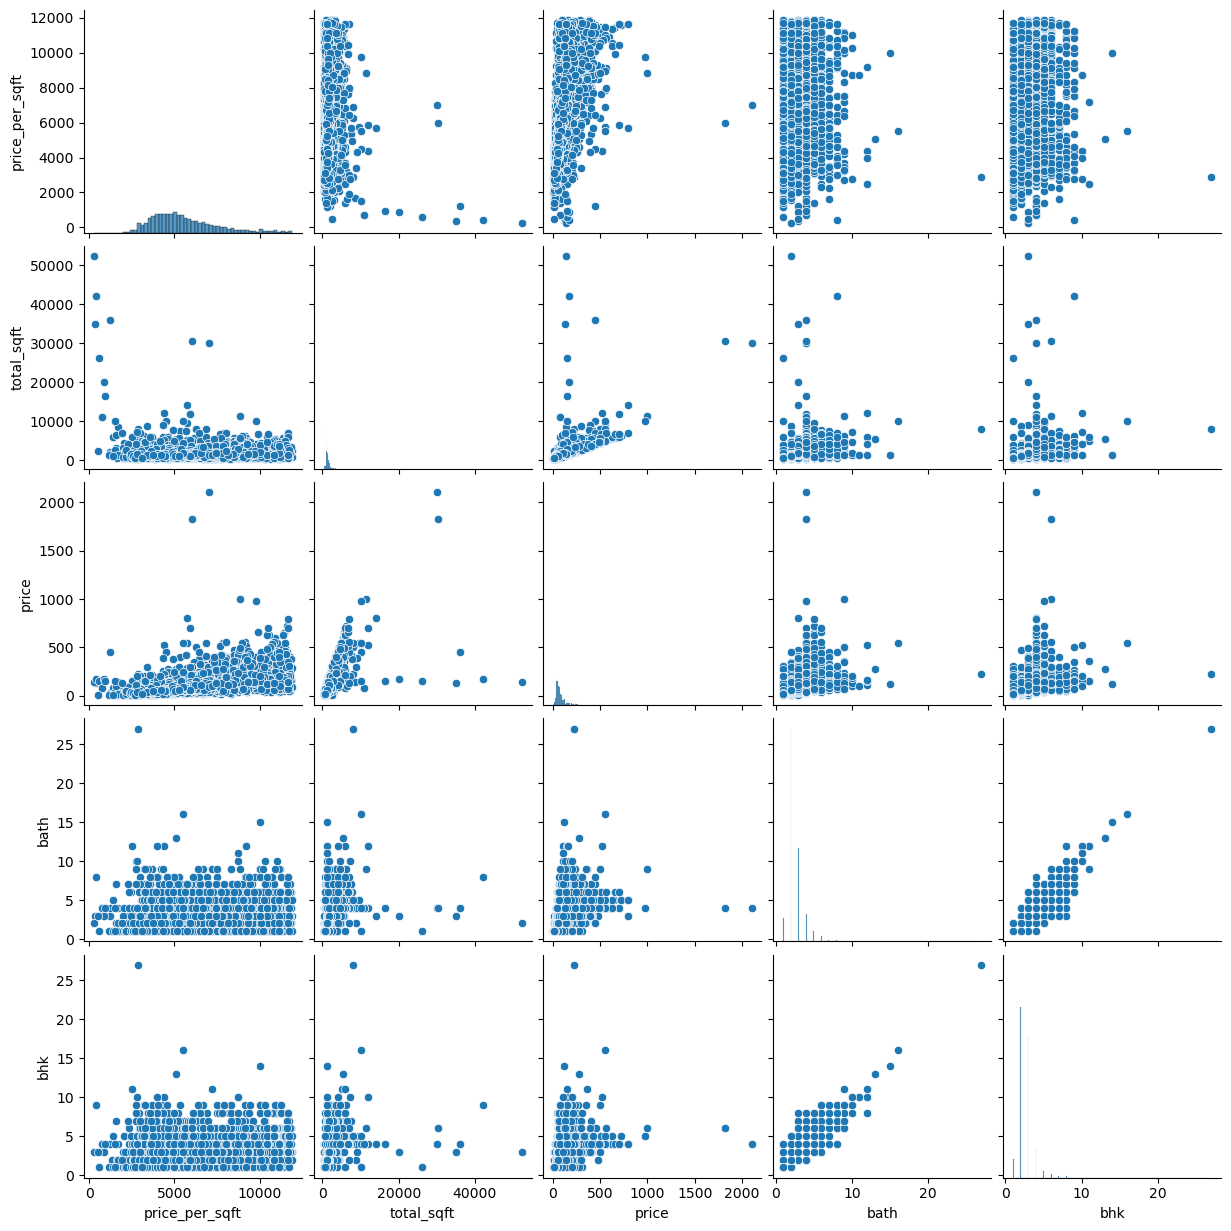

In [94]:
sns.pairplot(df_trimmed_iqr[['price_per_sqft', 'total_sqft', 'price', 'bath', 'bhk']])
plt.show()